In [113]:
## ML workflo

## data read
## EDA
## Understanding data
import pandas as pd
import seaborn as sns
import numpy as np
import os,re,sys
import matplotlib.pyplot as plt

%matplotlib inline

 <a id="21"></a> <br>
## Machine Learning Workflow


1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory Data Analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining


 <img src="http://s8.picofile.com/file/8344100018/workflow3.png" />



## Reading the data 
### use pandas pd.read_csv

 <a id="22"></a> <br>
## Real World Application Vs Competitions

<img src="http://s9.picofile.com/file/8339956300/reallife.png" height="600" width="500" />



In [112]:

loantraindata=pd.read_csv('D:/hackathon/loandata/train_ctrUa4K.csv')

## Viewing few top rows ( instead of 'head','tail' could be used to see bottom rows)

In [6]:
loantraindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## checking data shape

In [8]:
loantraindata.shape

(614, 13)

## checking distribution of DV

In [10]:
loantraindata['Loan_Status'].value_counts()/len(loantraindata)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## check missing values

In [7]:
loantraindata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### checking missing value percentage

In [151]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = round((df.isnull().sum())/(df.isnull().count()),3)*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
    
check_missing_data(loantraindata)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Total,0,13,3,15,0,32,0,0,22,14,50,0,0
Percent,0,2.1,0.5,2.4,0,5.2,0,0,3.6,2.3,8.1,0,0
Types,object,object,object,object,object,object,int64,float64,float64,float64,float64,object,object


## taking only non null values
### we would discuss treatment of missing values later

In [35]:
loantraindata_notnull = loantraindata.dropna()

### Checking shape of new data set

In [36]:
loantraindata_notnull.shape

(480, 13)

## checking column type (using dtypes)

In [40]:
loantraindata_notnull.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## changing column type of Credit_History to categorical ( object)

In [ ]:
loantraindata_notnull['Credit_History'] = loantraindata_notnull['Credit_History'].astype('object')

## Another way to see data frame columns types

In [71]:
loantraindata_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null object
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 52.5+ KB


## Viewing few rows

In [72]:
loantraindata_notnull.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


## Exploratory Data Analysis

*   1 Data Collection
*   2 Visualization
*   3 Data Preprocessing
*   4 Data Cleaning
<img src="http://s9.picofile.com/file/8338476134/EDA.png">



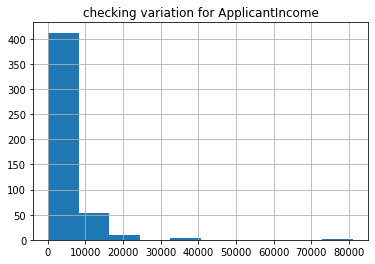

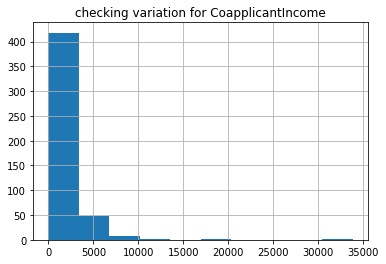

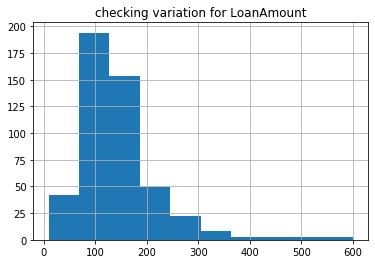

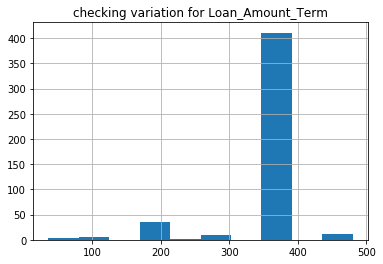

In [84]:
for g in loantraindata_notnull.select_dtypes(include=['float64','int64']).columns:
    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1=loantraindata_notnull[g].hist(ax=axes)
    f1.title.set_text("checking variation for {}".format(g))


In [85]:
loantraindata_notnull[['Loan_Status','LoanAmount']].groupby(['Loan_Status']).agg([np.mean,np.median])

LoanAmount       
                   mean median
Loan_Status                   
N            153.378378  128.0
Y            140.882530  128.0

In [86]:
loantraindata_notnull[['Loan_Status','ApplicantIncome']].groupby(['Loan_Status']).agg([np.mean,np.median])

ApplicantIncome        
                       mean  median
Loan_Status                        
N               5730.189189  3871.0
Y               5201.093373  3858.5

In [87]:
loantraindata_notnull[['Loan_Status','CoapplicantIncome']].groupby(['Loan_Status']).agg([np.mean,np.median])

CoapplicantIncome        
                         mean  median
Loan_Status                          
N                 1773.081081     0.0
Y                 1495.508795  1211.5

In [88]:
loantraindata_notnull[['Loan_Status','Loan_Amount_Term']].groupby(['Loan_Status']).agg([np.mean,np.median])

Loan_Amount_Term       
                        mean median
Loan_Status                        
N                 342.810811  360.0
Y                 341.710843  360.0

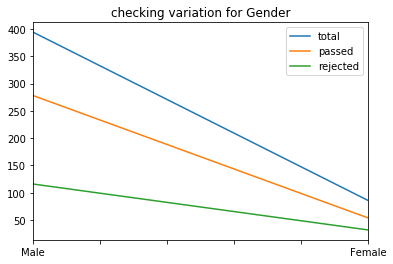

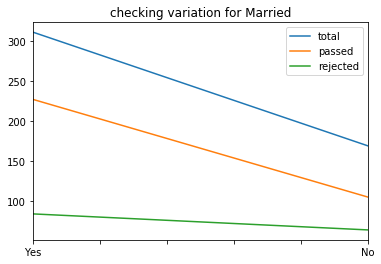

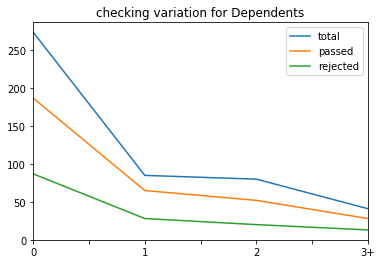

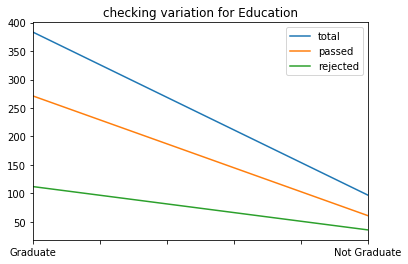

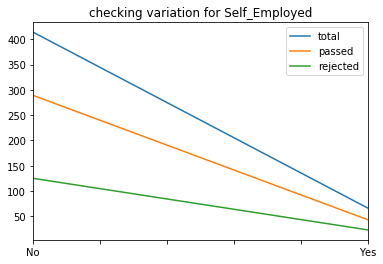

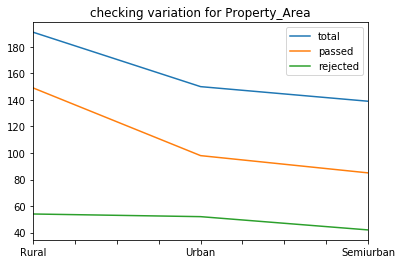

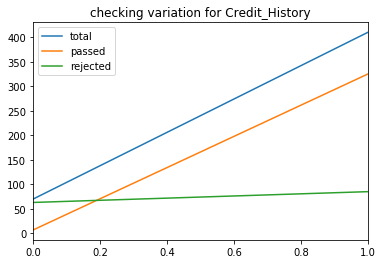

In [75]:
for c in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']:
    
   
    
    passed=loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'Y'][c].value_counts()
    rejected=loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'N'][c].value_counts()
    total=loantraindata_notnull[c].value_counts()

    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1= total.plot(ax=axes,label='total')
    f1.title.set_text("checking variation for {}".format(c))
    
    f2=passed.plot(ax=axes,label='passed')
    #f2.title.set_text("checking variation for {}".format(c))
    
    f3=rejected.plot(ax=axes,label='rejected')
    #f3.title.set_text("checking variation for {}".format(c))

    axes.legend(loc='best')



In [95]:
loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'Y']['Credit_History'].value_counts()/len(loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'Y'])

1.0    0.978916
0.0    0.021084
Name: Credit_History, dtype: float64

In [96]:
loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'N']['Credit_History'].value_counts()/len(loantraindata_notnull[loantraindata_notnull['Loan_Status'] == 'N'])

1.0    0.574324
0.0    0.425676
Name: Credit_History, dtype: float64

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


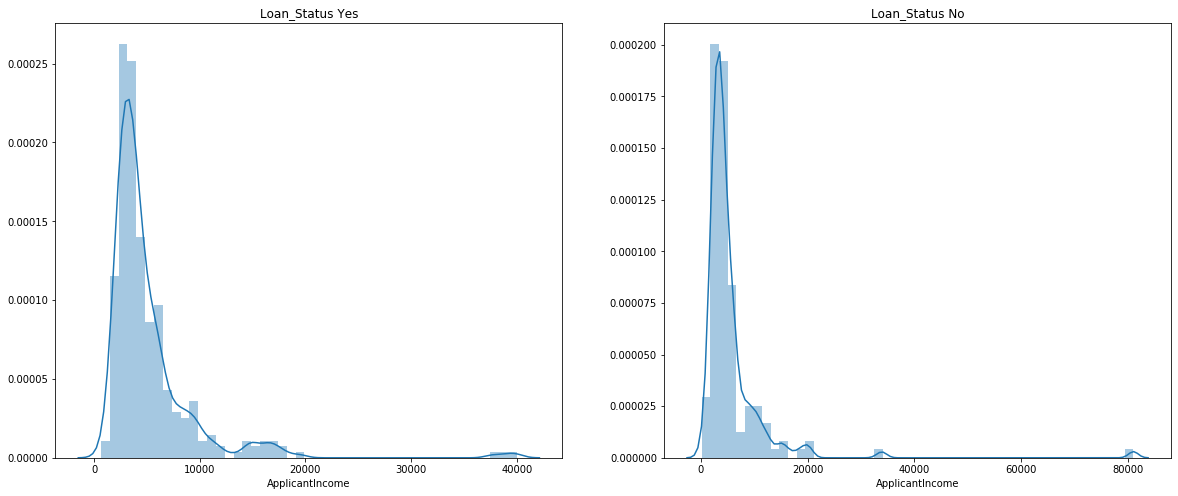

In [98]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].ApplicantIncome,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].ApplicantIncome,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

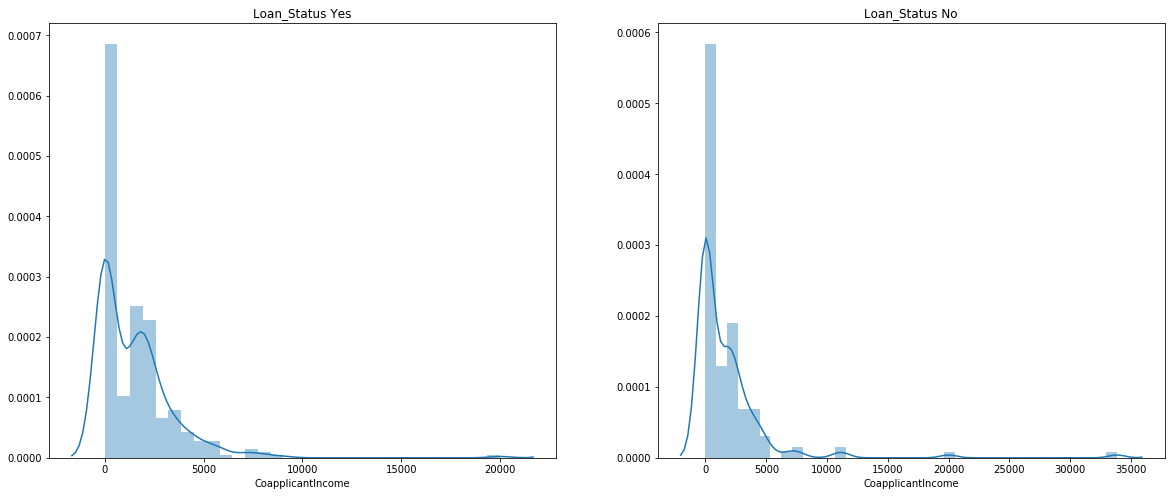

In [99]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].CoapplicantIncome,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].CoapplicantIncome,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

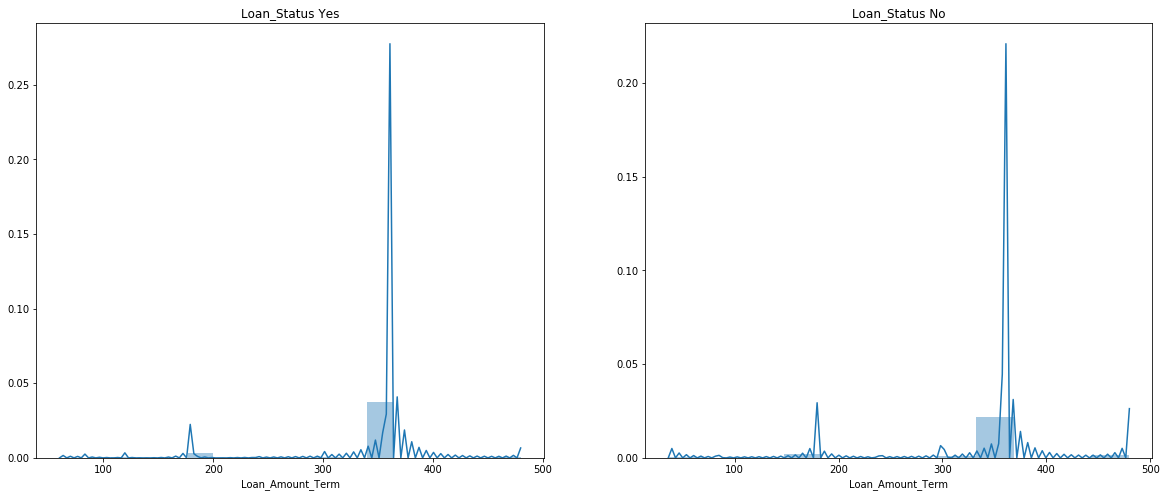

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].Loan_Amount_Term,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].Loan_Amount_Term,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

In [102]:
loantraindata_notnull['log_LoanAmount']=loantraindata_notnull['LoanAmount'].apply(lambda x : np.log(x))

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


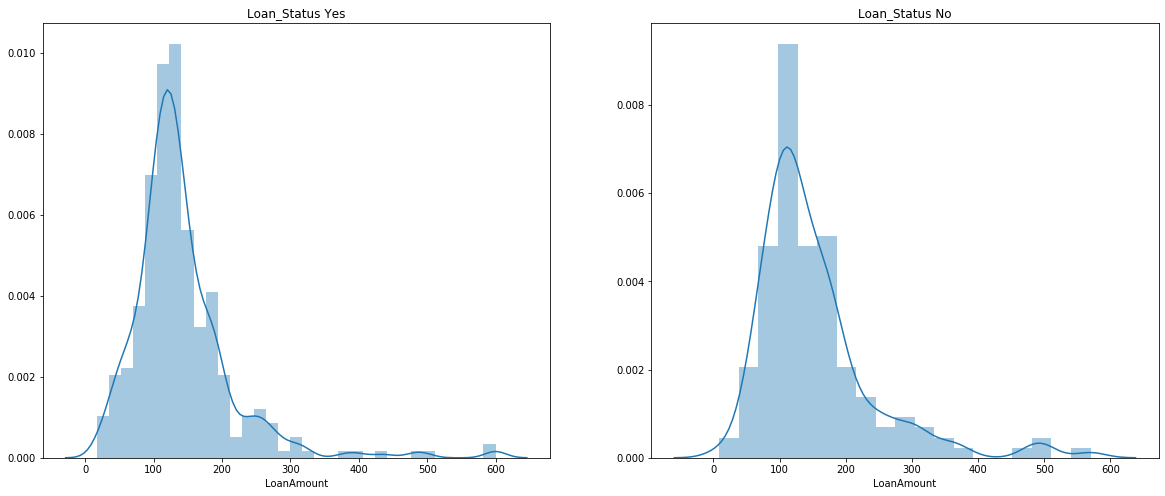

In [104]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].LoanAmount,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].LoanAmount,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


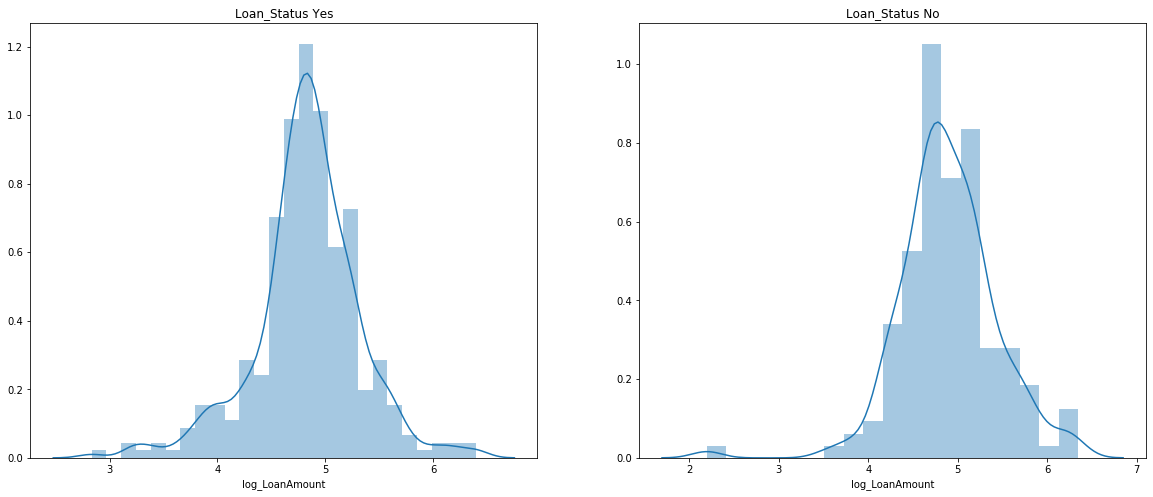

In [103]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='Y'].log_LoanAmount,ax=ax[0])
ax[0].set_title('Loan_Status Yes')
sns.distplot(loantraindata_notnull[loantraindata_notnull['Loan_Status']=='N'].log_LoanAmount,ax=ax[1])
ax[1].set_title('Loan_Status No')

plt.show()

## Pairplots to analyse variation of numeric columns and distribution with DV

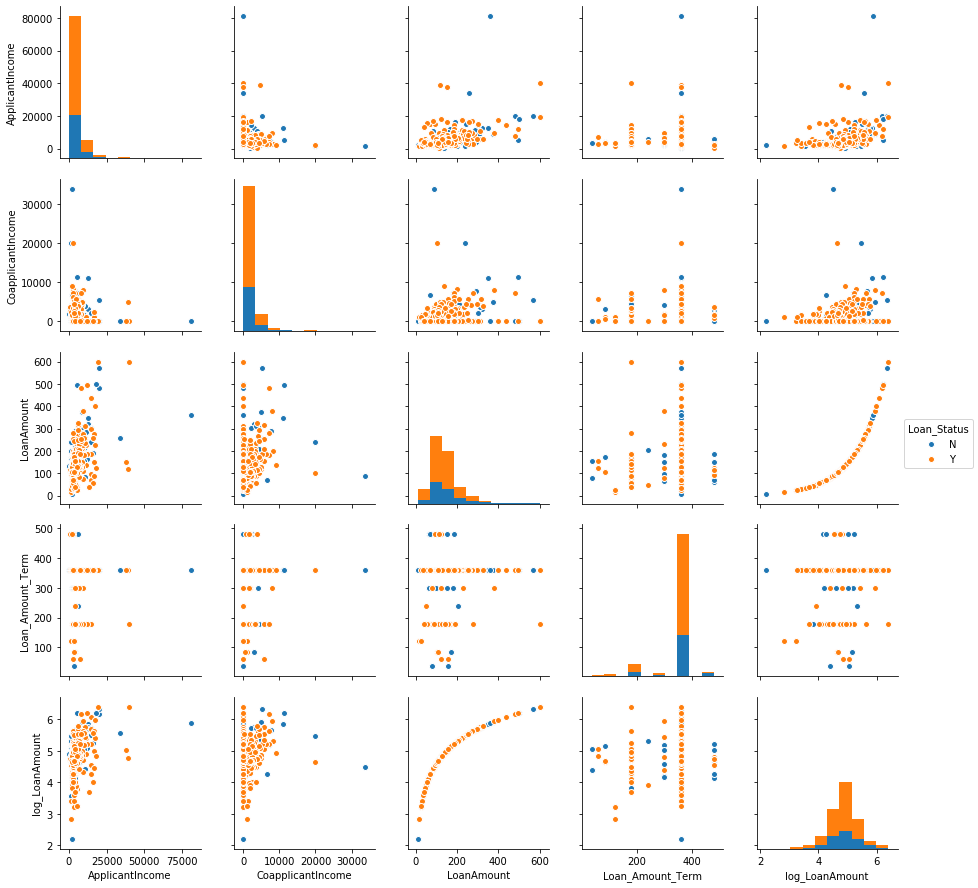

In [138]:
neededcols=list(loantraindata_notnull.select_dtypes(include=['float64','int64']).columns) + ['Loan_Status']
sns.pairplot(loantraindata_notnull[neededcols],hue='Loan_Status',size=2.5)

## Once EDA is done, we can try more ways to normalize/feature enginner the data and then comes the Modeling stage

## What is Machine Learning and ML Algorithm(s)

<img src="https://thinkmedia.com.ng/wp-content/uploads/2019/05/0.png" height="700" width="1000" />

## Mind Map of different ML algos

<img src="https://i0.wp.com/techutils.in/wp-content/uploads/2015/12/MachineLearningAlgorithms-1.png" height="700" width="1000" />

## How to we select an Algorithm
### Key points to understand here are 
* 1 What is a selection criteria
* 2 Performance Measures : Differrent methods to measure performance of Algos
* 3 Overfitting & Underfitting (Bias-Variance Trade-Off)


## overfitting &  underfitting

<img src='https://cdn-images-1.medium.com/max/800/1*JZbxrdzabrT33Yl-LrmShw.png' width=500 height=500>
1. graph on the left side:
    1. we can predict that the line does not cover all the points shown in the graph. Such model tend to cause underfitting of data .It also called High Bias.

1. graph on right side:
    1. shows the predicted line covers all the points in graph. In such condition you can also think that it’s a good graph which cover all the points. But that’s not actually true, the predicted line into the graph covers all points which are noise and outlier. Such model are also responsible to predict poor result due to its complexity.It is also called High Variance.

1. middle graph:
    1. it shows a pretty good predicted line. It covers majority of the point in graph and also maintains the balance between bias and variance.[30]

## Bootstrap sampling

In [171]:


from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]
OOB Sample: [0.2, 0.3]


## Example of confidence Interval creation on our data

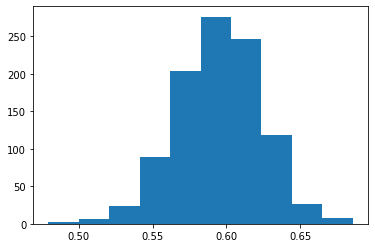

95.0 confidence interval 53.8% and 64.7%


In [160]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# load dataset
neededcols=list(loantraindata_notnull.select_dtypes(include=['float64','int64']).columns) + ['Loan_Status']

data = loantraindata_notnull[neededcols]
values = data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    #print(score)
    stats.append(score)
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Difference and working of different ML algos

### Parametric & Non-parametric ML Algorithm


### Linear Models 
### Support Vector Machine
### Decision Tree models
### Baging Aggregation and boosting

### Types of optimization Algorithms

In [173]:
## Mean Square Error , Mean Absolute Error, log liklihood, Accuracy, Confusion Table, Recall, Precision, F1 Score

<img src='http://cs231n.github.io/assets/nn3/opt1.gif' width=500 height=500>
<img src='http://cs231n.github.io/assets/nn3/opt2.gif' width=500 height=500>


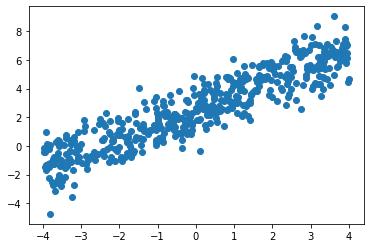

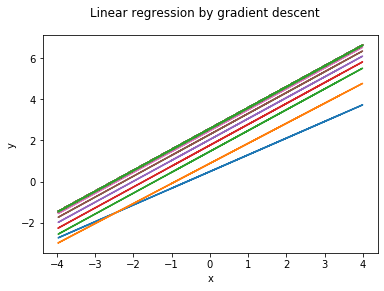

[[2.57347279]
 [1.0144697 ]]


In [178]:

x = np.random.uniform(-4,4,500)       
y = x + np.random.standard_normal(500)+2.5
plt.plot(x, y, 'o')
plt.show()
def cost(X, Y, theta):
    J=np.dot((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y))/(2*len(Y))
    return J
alpha = 0.1 # Specify the learning rate
theta =  np.array([[0,0]]).T # Initial values of theta
X = np.c_[np.ones(500),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 1000
cost_history=[]
theta_history=[]
for i in range(num_iters):
    a=np.sum(theta[0]- alpha * (1/len(Y)) * np.sum((np.dot(X,theta)- Y)))
    b=np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(np.dot(X_1,(np.dot(X,theta)-Y))))
    theta= np.array([[a],[b]])
    cost_history.append(cost(X,Y,theta))
    theta_history.append(theta)
    if i in (1,3,7,10,14,num_iters): 
        plt.plot(x, a+x*b)
        plt.suptitle('Linear regression by gradient descent')
        plt.xlabel('x')
        plt.ylabel('y')
        
    elif i in range(20,num_iters,10):
        plt.plot(x, a+x*b)
        
plt.show()
print(theta)


In [179]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show code."></form>''')